# **Laboratorio 2**
**Daniela Navas**

## **Task 1** - Preguntas Teóricas

**1. ¿Por qué el modelo de Naive Bayes se le considera “naive”?**<br>
Se considera *ingenuo* debido a la suposición de que las características o predictores en un conjunto de datos son independientes entre sí, lo que se conoce como independencia condicional de clase. Esta suposición simplifica el cálculo de las probabilidades, ya que solo se necesita calcular la probabilidad de cada característica de forma individual, sin considerar las interacciones entre ellas. Aunque esta suposición no siempre se cumple en la realidad, donde las características suelen estar interrelacionadas, el algoritmo sigue siendo efectivo y fácil de implementar, especialmente con grandes conjuntos de datos.


**2. Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda ¿cómo funciona el truco del Kernel para este modelo? (Lo que se espera de esta pregunta es que puedan explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase)**<br>
**Support Vector Machine**<br>
En Support Vector Machine (SVM), el objetivo es encontrar el hiperplano que mejor separa las clases en el espacio de características.<br> 
Primero se determina un hiperplano que separe dos clases de datos en un espacio de características. El hiperplano se define por la ecuación:

$$\mathbf{w} \cdot \mathbf{x} + b = 0$$

donde:
- Vector de pesos: $ \mathbf{w} $
- Sesgo (bias): $ b $
- Vector de características: $ \mathbf{x} $


Para que los datos estén correctamente clasificados, se deben cumplir las siguientes condiciones:
- Para puntos de la clase $+1$: $ \mathbf{w} \cdot \mathbf{x}_i + b \geq 1 $
- Para puntos de la clase $-1$: $ \mathbf{w} \cdot \mathbf{x}_i + b \leq -1 $

Combinandolas en una sola:

$$y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i$$

donde $y_i$ es la etiqueta de la clase (+1 o -1).

El margen es la distancia entre los puntos más cercanos de cada clase y el hiperplano. Queremos maximizar este margen. La distancia de un punto al hiperplano es:

$$\frac{1}{\|\mathbf{w}\|}$$

Para maximizar el margen, minimizamos $\|\mathbf{w}\|$. Sin embargo, para simplificar los cálculos, minimizamos $\frac{1}{2} \|\mathbf{w}\|^2$ en su lugar.

El problema de optimización se formula como:

$$\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2$$

sujeto a las restricciones:

$$y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \quad \forall i$$

Esto nos lleva a un problema de optimización cuadrática con restricciones lineales. Se puede resolver usando métodos como los multiplicadores de Lagrange y técnicas de programación cuadrática.

Si los datos no son linealmente separables en el espacio original, utilizamos el truco del Kernel para mapear los datos a un espacio de mayor dimensión donde sí sean separables. Esto se hace mediante una función de kernel $K(\mathbf{x}_i, \mathbf{x}_j)$ que calcula el producto interno en el espacio transformado.

**Truco del Kernel**<br>
El truco del Kernel permite a SVM manejar datos que no son linealmente separables en el espacio original de características. La idea es transformar los datos a un espacio de mayor dimensión donde sí sean linealmente separables. Esto se hace mediante una función de kernel $K(\mathbf{x}_i, \mathbf{x}_j)$ que calcula el producto interno en el espacio transformado sin necesidad de calcular explícitamente la transformación.

Si hay un conjunto de datos $\{\mathbf{x}_i, y_i\}$ donde $\mathbf{x}_i$ es el vector de características y $y_i$ es la etiqueta de clase. En el espacio original, los datos no son linealmente separables.

Queremos transformar los datos a un espacio de mayor dimensión utilizando una función de transformación $\phi(\mathbf{x})$. Sin embargo, calcular explícitamente $\phi(\mathbf{x})$ puede ser computacionalmente costoso.

En lugar de calcular $\phi(\mathbf{x})$ directamente, utilizamos una función de kernel $K(\mathbf{x}_i, \mathbf{x}_j)$ que calcula el producto interno en el espacio transformado:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)$$


**3. Investigue sobre Random Forest y responda**<br>  
**a. ¿Qué tipo de ensemble learning es este modelo?**<br> 
Random Forest es un ejemplo de bagging (bootstrap aggregating). En este enfoque, se generan múltiples modelos (en este caso, árboles de decisión) entrenados en diferentes subconjuntos de datos obtenidos mediante muestreo con reemplazo. Este método busca reducir la varianza y mejorar la estabilidad del modelo al promediar las predicciones de varios árboles.

**b. ¿Cuál es la idea general detrás de Random Forest?**<br> 
Crear un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión de las predicciones. Cada árbol es entrenado con una muestra aleatoria de los datos y, durante el proceso de construcción, se selecciona un subconjunto aleatorio de características para cada división en el árbol. Esto permite que los árboles sean diversos y, al final, sus resultados se combinan mediante votación (en clasificación) o promediación (en regresión) para obtener una predicción final más robusta.

**c. ¿Por qué se busca baja correlación entre los árboles de Random Forest?**<br>
La baja correlación entre los árboles en un modelo de Random Forest es crucial porque permite que cada árbol capture diferentes patrones en los datos. Si los árboles están muy correlacionados, sus errores también lo estarán, lo que puede llevar a una reducción limitada en la varianza del modelo. Al promover la diversidad entre los árboles, se mejora la capacidad del modelo para generalizar a nuevos datos y se reduce el riesgo de sobreajuste. Este enfoque asegura que la combinación de las predicciones sea más efectiva y robusta.

## **Task 2** -  Naive Bayes: Clasificador de Mensajes Ham/Spam<br>
Deberá construir un programa que reciba como entrada un archivo llamado “entrenamiento.txt” que será su dataset para entrenar un modelo basado en Bayes/Laplace Smoothing para clasificar mensajes como ham o spam. De dicho modelo, deberá reportar alguna métrica de desempeño. Además, con dicho modelo deberá ser capaz de interpretar mensajes futuros como spam o ham. Asimismo, deberá considerar las siguientes restricciones: 
- Solamente se podrá entrenar un modelo por dataset de entrenamiento (No se pueden cargar más de un archivo para entrenar el modelo) 
- Deberá limpiar el dataset de caracteres especiales y de combinaciones de mayúsculas/minúsculas. 
- Cada línea representa una observación (mensaje con su respectiva categoría) 
-  Del dataset dado deberá dividirlo en training y test. 
    - Para este punto, podrá usar librerías externas como las dadas en sklearn.  
    - **NO** se aceptará el uso de librerías para la construcción del modelo principal

### **Task 2.1** - Lectura y limpieza del dataset<br> 
Reciba como entrada un archivo llamado “entrenamiento.txt” que tendrá una estructura como la que se muestra 
abajo. En dicho archivo, cada línea representa un mensaje, y la primera palabra de la línea indica si es un mensaje 
Ham o Spam (etiqueta/categoría del mensaje), luego encuentra una tabulación (\t) para separar la etiqueta del 
verdadero mensaje, finalmente está el mensaje que termina hasta que encuentre un cambio de línea (\n). En base a 
este archivo, usted deberá entrenar un modelo basado en Bayes con Laplace Smoothing para clasificar mensajes 
como spam o ham.<br>  
Además, deberá limpiar el archivo de texto, teniendo en cuenta que pueden haber caracteres especiales que 
solamente agreguen ruido al mensaje y otros que pueden llegar a ser de utilidad para la clasificación. De igual modo, 
se recomienda cambiar los mensajes a que todos sigan la misma nomenclatura, es decir, todo en mayúsculas o bien, 
todo en minúscula, o similar, de modo tal que pueda clasificar de mejor manera la participación de cada palabra para 
determinar la categoría del mensaje.<br>   
También, deberá separar el dataset con un 80% para training, 20% para testing. Si llegan a necesitar una parte para 
validation, pueden subdividir el 20% de testing en 10% para validation y 10% para testing. Recuerden que esta división 
siempre deberá ser realizada de forma aleatoria, para reproducir sus resultados usen una seed.<br>  


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

# Abrir archivo 
with open("entrenamiento.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Convertir en un set donde se tenga la etiqueta y el mensaje
data = []
for line in lines:
    parts = line.strip().split("\t", 1)  # Separar solo en la primera tabulación
    if len(parts) == 2:
        label, message = parts
        data.append((label, message)) # Nombrar "label" si es Spam o Ham; y "message" al contenido en si del mensaje

# Convertir a DataFrame
df = pd.DataFrame(data, columns=["label", "message"])

# Limpieza de datos | Eliminar ruido
def clean_text(text):
    text = text.lower()                      # Convertir a minúsculas (Normalizar)
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Eliminar caracteres especiales (Filtro ruido)
    return text

df["message"] = df["message"].apply(clean_text) # Despues de separar, aplicar limpieza a todos los datos

# División en conjuntos de entrenamiento (80%) y prueba (20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


### **Task 2.2** - Construcción del modelo<br> 
Una vez tenga una forma de leer y limpiar el dataset, deberá crear un modelo basado en Bayes con Laplace Smoothing para que clasifique los mensajes en spam o ham. Esto deberá basarse en la probabilidad de cada palabra en pertenecer a cada uno de los posibles grupos. Cuando tenga la probabilidad del mensaje que sea spam o ham, deberá clasificarlo con la probabilidad de la categoría que resulte mayor.<br>  
Es importante tomar en cuenta que el entrenamiento y construcción del modelo deberá hacerse usando solamente la parte de training del dataset.<br>  

In [21]:
from collections import defaultdict
from sklearn.metrics import accuracy_score, confusion_matrix

# Entenamiento basado en probabilidad de Bayes 
def entrenar_bayes(mensajes, etiquetas, alpha=1):
    vocabulario = set()                                                     # Almacenar palabras únicas
    conteo_palabras = {'ham': defaultdict(int), 'spam': defaultdict(int)}   # Contar cuantas veces aparece cada palabra en spam y ham
    total_palabras = {'ham': 0, 'spam': 0}                                  # Total de palabras en spam y ham
    total_mensajes = {'ham': 0, 'spam': 0}                                  # Total de mensajes spam y ham
    
    for mensaje, etiqueta in zip(mensajes, etiquetas): # Recorrer cada mensaje y: 
        total_mensajes[etiqueta] += 1                  # Sumar en ham o spam, según corresponde
        palabras = mensaje.split()                     # Separar palabras 
        for palabra in palabras:                       # Contar cuantas veces aparece cada palabra en cada una de sus categorías. 
            vocabulario.add(palabra)
            conteo_palabras[etiqueta][palabra] += 1
            total_palabras[etiqueta] += 1              # Sumar en la cuenta general de palabras
    
    return vocabulario, conteo_palabras, total_palabras, total_mensajes #Retorna valores necesarios para el calculo de la probabilidad usando Bayes 

# Cálculo de Probabilidades usando Naive Bayes con Laplace Smoothing
def calcular_probabilidades(mensaje, vocabulario, conteo_palabras, total_palabras, total_mensajes, alpha=1): # Recibe valores del conteo que se hizo previamente 
    categorias = ['ham', 'spam']                         # Se tiene spam o ham
    total_mensajes_total = sum(total_mensajes.values())  
    probabilidades = {}
    palabras = mensaje.split()
    
    for categoria in categorias: # Recorrer Spam y ham
        prob_categoria = np.log(total_mensajes[categoria] / total_mensajes_total) # Proabilidad de uno u otro | Uso de log ya que al multiplicar probabilidades se obtienen cantidades pequeñas por lo que se toma el logaritmo de cada una y se suman, lo que evita que los valores se reduzcan demasiado.
        prob_palabras = 0 # Iniciar en cero
        for palabra in palabras: # Recorrer todas las palabras 
            conteo = conteo_palabras[categoria][palabra] + alpha # Laplace Smoothing para evitar probabilidades de cero
            prob_palabras += np.log(conteo / (total_palabras[categoria] + alpha * len(vocabulario)))
        probabilidades[categoria] = prob_categoria + prob_palabras 
    
    return max(probabilidades, key=probabilidades.get) # Retornar la categoría con mayor probabilidad (Spam o Ham)

def predecir(mensajes, vocabulario, conteo_palabras, total_palabras, total_mensajes): # Maximixar el proceso definiendo función que aplica calcular_probabilidades a cada mensaje para predecir su categoría
    return [calcular_probabilidades(mensaje, vocabulario, conteo_palabras, total_palabras, total_mensajes) for mensaje in mensajes]

# Entrenamiento de modelo usando la data de entrenamineto (train_data)
vocabulario, conteo_palabras, total_palabras, total_mensajes = entrenar_bayes(train_data["message"], train_data["label"])

Cuando ya tengan entrenado su modelo, deberán probar el modelo usando la parte de testing del dataset. La métrica a utilizar deberá proponerla considerando la distribución de clases/categorías en el dataset. Recuerde dejar justificada su respuesta en los comentarios de su código.<br>  
Presente al final del entrenamiento, la métrica de desempeño sobre el subset de training y sobre el subset de testing.<br>

In [47]:
# Evaluar el rendimiento del modelo usando la data de prueba (test_data) y lo obtenido del modelo entrenado
predicciones = predecir(test_data["message"], vocabulario, conteo_palabras, total_palabras, total_mensajes)

train_predicciones = predecir(train_data["message"], vocabulario, conteo_palabras, total_palabras, total_mensajes) # Luego tambien en train (Se pide en el enunciado)

# Obtención de métricas de rendimiento
# Matriz de confusión
labels = ['ham', 'spam']
cm = confusion_matrix(test_data["label"], predicciones, labels=labels)
TP = cm[1, 1]  # spam correctamente clasificado
FP = cm[0, 1]  # ham clasificado como spam
FN = cm[1, 0]  # spam clasificado como ham
TN = cm[0, 0]  # ham correctamente clasificado

# Calcular métricas
precision_metric = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0

# TEST DATA
# Mostrar la matriz de confusión
print("\n--- TEST DATA ---")
print("Matriz de confusión:")
print(f"TP: {TP}, FP: {FP}")
print(f"FN: {FN}, TN: {TN}")
print("------------------------------------------")

# Métrica de desempeño: Precisión, Sensibilidad y Especificidad
print("Precisión:", precision_metric*100, "%")
print("Sensibilidad:", sensibilidad*100, " %")
print("Especificidad:", especificidad*100, " %")


# TRAIN DATA
train_precision = accuracy_score(train_data["label"], train_predicciones)
train_cm = confusion_matrix(train_data["label"], train_predicciones, labels=['ham', 'spam'])
train_TP = train_cm[1, 1]
train_FP = train_cm[0, 1]
train_FN = train_cm[1, 0]
train_TN = train_cm[0, 0]
train_precision_metric = (train_TP + train_TN) / (train_TP + train_TN + train_FP + train_FN) if (TP + TN + FP + FN) > 0 else 0
train_sensibilidad = train_TP / (train_TP + train_FN) if (train_TP + train_FN) > 0 else 0
train_especificidad = train_TN / (train_TN + train_FP) if (train_TN + train_FP) > 0 else 0

# Mostrar la matriz de confusión
print("\n--- TRAIN DATA ---")
print("Matriz de confusión:")
print(f"TP: {train_TP}, FP: {train_FP}")
print(f"FN: {train_FN}, TN: {train_TN}")
print("------------------------------------------")

# Métrica de desempeño: Precisión, Sensibilidad y Especificidad
print("Precisión:", train_precision_metric*100, "%")
print("Sensibilidad:", train_sensibilidad*100, " %")
print("Especificidad:", train_especificidad*100, " %")



--- TEST DATA ---
Matriz de confusión:
TP: 157, FP: 18
FN: 6, TN: 932
------------------------------------------
Precisión: 97.84366576819407 %
Sensibilidad: 96.31901840490798  %
Especificidad: 98.10526315789474  %

--- TRAIN DATA ---
Matriz de confusión:
TP: 559, FP: 14
FN: 25, TN: 3854
------------------------------------------
Precisión: 99.12398921832884 %
Sensibilidad: 95.71917808219177  %
Especificidad: 99.63805584281282  %


Por medio de ello, se puede definir que el modelo sobre el subset de training tiene:<br>
- **Precisión:** 99.12% <br>
- **Sensibilidad:** 95.72% <br>
- **Especificidad:** 99.64% <br>

Y el modelo sobre el subset de testing tiene:<br>
- **Precisión:** 97.84% <br>
- **Sensibilidad:** 96.31% <br>
- **Especificidad:** 98.11% <br>

El modelo muestra un excelente desempeño en el conjunto de entrenamiento, con una precisión del 99.12%, una alta sensibilidad del 95.72% y una especificidad del 99.64%. Esto indica que el modelo clasifica correctamente la mayoría de los correos, tanto spam como ham, con un bajo índice de falsos positivos y falsos negativos. Sin embargo, en el conjunto de prueba, la precisión disminuye a 97.42%, lo que sugiere una menor capacidad para clasificar correctamente los correos en datos no vistos. A pesar de ello, la sensibilidad sigue siendo alta (96.31%), lo que indica que el modelo sigue detectando correctamente la mayoría de los correos spam, aunque la ligera disminución en la especificidad (98.11%) implica un pequeño aumento en los falsos positivos. Esta diferencia de rendimiento entre los conjuntos de entrenamiento y prueba sugiere que el modelo puede estar ligeramente sobreajustado, es decir, que se ha ajustado demasiado a los datos de entrenamiento y ha perdido algo de generalización. Aún así, su rendimiento general sigue siendo sólido, especialmente en la detección de correos spam.

---

### **Task 2.3** - Clasificación de mensajes futuros<br> 
Al finalizar el entrenamiento de su modelo, permita que se ingresen nuevos mensajes de forma individual desde su interfaz (ya sea en consola o en una interfaz gráfica). Y que estos se clasifiquen usando su modelo. Su programa deberá poder recibir cualquier tipo de mensaje y devolver la probabilidad de que sea spam y ham, así mismo como cuál es la decisión de clasificación de su modelo.  

In [28]:
# Función para clasificar un mensaje ingresado por el usuario
def clasificar_mensaje():
    while True: # Usar un ciclo While
        mensaje = input("Ingrese un mensaje para clasificar (o 'salir' para terminar): ") # Leer entrada
        if mensaje.lower() == 'salir': # Si es salir
            print("SALIENDO... \n")
            break                      # Terminar ejecución
        print("El mensaje: " , mensaje)
        mensaje = clean_text(mensaje) 
        clasificacion = calcular_probabilidades(mensaje, vocabulario, conteo_palabras, total_palabras, total_mensajes)
        print(f"Ha sido clasificado como: {clasificacion}\n")
    
clasificar_mensaje()


El mensaje:  hello, how are you?
Ha sido clasificado como: ham

El mensaje:  Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am
Ha sido clasificado como: ham

El mensaje:  XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Ha sido clasificado como: spam

El mensaje:  Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am
Ha sido clasificado como: ham

El mensaje:  Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am
Ha sido clasificado como: ham

SALIENDO... 



### **Task 2.4** - Comparación con Librerías<br> 
Entrene un modelo de Bayes usando alguna librería ya existente como sklearn.naive_bayes.MultinomialNB en Python. Este deberá usar el mismo dataset dado, y deberá además dividirlo en training y testing como en el Task 2.1. Compare la métrica de desempeño tanto en training como en testing con la misma implementación que usted realizó.

In [48]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Abrir archivo 
with open("entrenamiento.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Convertir en un set donde se tenga la etiqueta y el mensaje
data = []
for line in lines:
    parts = line.strip().split("\t", 1)  # Separar solo en la primera tabulación
    if len(parts) == 2:
        label, message = parts
        data.append((label, message)) # Nombrar "label" si es Spam o Ham; y "message" al contenido en si del mensaje

# Convertir a DataFrame
df = pd.DataFrame(data, columns=["label", "message"])

# Limpieza de datos | Eliminar ruido
def clean_text(text):
    text = text.lower()                      # Convertir a minúsculas (Normalizar)
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Eliminar caracteres especiales (Filtro ruido)
    return text

df["message"] = df["message"].apply(clean_text) # Despues de separar, aplicar limpieza a todos los datos

# División en conjuntos de entrenamiento (80%) y prueba (20%)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Vectorización de los mensajes (transformar texto en vectores numéricos)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['message'])
X_test = vectorizer.transform(test_data['message'])

# Etiquetas (Spam o Ham)
y_train = train_data['label']
y_test = test_data['label']

# Modelo de Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Métricas de desempeño
# TRAIN DATA
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

TP_train = conf_matrix_train[1, 1]  # spam correctamente clasificado
FP_train = conf_matrix_train[0, 1]  # ham clasificado como spam
FN_train = conf_matrix_train[1, 0]  # spam clasificado como ham
TN_train = conf_matrix_train[0, 0]  # ham correctamente clasificado

precision_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train) if (TP_train + TN_train + FP_train + FN_train) > 0 else 0
recall_train = TP_train / (TP_train + FN_train) if (TP_train + FN_train) > 0 else 0
specificity_train = TN_train / (TN_train + FP_train) if (TN_train + FP_train) > 0 else 0

# Mostrar la matriz de confusión
print("\n--- TRAIN DATA ---")
print("Matriz de confusión:")
print(f"TP: {TP_train}, FP: {FP_train}")
print(f"FN: {FN_train}, TN: {TN_train}")
print("------------------------------------------")

# Métrica de desempeño: Precisión, Sensibilidad y Especificidad
print("Precisión:", precision_train*100, "%")
print("Sensibilidad:", recall_train*100, " %")
print("Especificidad:", specificity_train*100, " %")

# ---------------------------------------------------------------------------------------------------------------------------
# TEST DATA
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

TP_test = conf_matrix_test[1, 1]  # spam correctamente clasificado
FP_test = conf_matrix_test[0, 1]  # ham clasificado como spam
FN_test = conf_matrix_test[1, 0]  # spam clasificado como ham
TN_test = conf_matrix_test[0, 0]  # ham correctamente clasificado

precision_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test) if (TP_test + TN_test + FP_test + FN_test) > 0 else 0
recall_test = TP_test / (TP_test + FN_test) if (TP_test + FN_test) > 0 else 0
specificity_test = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0

# Mostrar la matriz de confusión
print("\n--- TEST DATA ---")
print("Matriz de confusión:")
print(f"TP: {TP_test}, FP: {FP_test}")
print(f"FN: {FN_test}, TN: {TN_test}")
print("------------------------------------------")

# Métrica de desempeño: Precisión, Sensibilidad y Especificidad
print("Precisión:", precision_test*100, "%")
print("Sensibilidad:", recall_test*100, " %")
print("Especificidad:", specificity_test*100, " %")


--- TRAIN DATA ---
Matriz de confusión:
TP: 560, FP: 14
FN: 24, TN: 3854
------------------------------------------
Precisión: 99.1464510332435 %
Sensibilidad: 95.8904109589041  %
Especificidad: 99.63805584281282  %

--- TEST DATA ---
Matriz de confusión:
TP: 151, FP: 4
FN: 12, TN: 946
------------------------------------------
Precisión: 98.56244384546271 %
Sensibilidad: 92.63803680981594  %
Especificidad: 99.57894736842105  %


Por medio de ello, se puede definir que el modelo sobre el subset de training tiene:<br>
- **Precisión:** 99.15% <br>
- **Sensibilidad:** 95.89% <br>
- **Especificidad:** 99.63% <br>

Y el modelo sobre el subset de testing tiene:<br>
- **Precisión:** 98.56% <br>
- **Sensibilidad:** 92.63% <br>
- **Especificidad:** 99.58% <br>

**¿Cuál implementación lo hizo mejor? ¿Su implementación o la de la librería?**<br>
Comparando ambos modelos, podemos observar que ambos tienen un desempeño similar en el conjunto de entrenamiento, con una precisión muy alta. Sin embargo, al analizar el conjunto de prueba, el modelo implementado con librerías tiene una mayor precisión (98.56%) en comparación con el modelo a mano (97.84%). El modelo con libreria muestra un mejor rendimiento en el conjunto de prueba, lo que podría indicar que está mejor ajustado para generalizar a datos no vistos. Sin embargo, esto no siempre es ideal. Un modelo que se ajusta demasiado a los datos de entrenamiento puede perder capacidad de generalización, y aunque la precisión sea mayor, es posible que no se mantenga ese buen rendimiento en situaciones más complejas o con datos adicionales.


**¿Por qué cree que se debe esta diferencia?**<br>
Las librerías de machine learning, como las que se usan en bibliotecas como `scikit-learn`, suelen aplicar optimizaciones y técnicas de regularización que ayudan a evitar el sobreajuste, pero a costa de una ligera reducción en la precisión, especialmente en el conjunto de prueba. Aunque los resultados del modelo con librerías muestran una disminución en la precisión, su capacidad para evitar sobreajuste podría ser más efectiva a largo plazo, garantizando que el modelo no aprenda patrones espurios específicos de los datos de entrenamiento. Las librerías suelen incluir técnicas de preprocesamiento más robustas, manejo de datos faltantes, normalización, y validación cruzada que pueden ayudar a mejorar el rendimiento general. El modelo hecho a mano podría no haber utilizado todas estas técnicas o podría haber tenido limitaciones en su implementación.

---

## **Task 3** -  Clasificación de Partidas de League of Legends<br>
League of Legends es un juego online multijugador, que suele ser categorizado como un MOBA (multiplayer online battle arena). Este se desarrolla en base a dos equipos (azul y rojo), en el cual 5 jugadores pertenecen a cada equipo y cada uno tiene un rol diferente, habiendo entonces 5 roles diferentes. En el campo de juego hay 3 líneas y una jungla. El objetivo del juego es derribar el Nexus enemigo.  

Deberá construir un modelo para un problema de clasificación en el cual usará un set de datos del juego League of Legends y deberá usar como su variable objetivo si el equipo azul gana. Recuerden que: 
- Deben hacer una breve exploración con los datos. Esto implica, pero no está limitado a: 
    - Hacer encoding de las variables que se necesiten 
    - Revisar si el dataset está balanceado, caso no estarlo, aplicar alguna técnica para balancearlo lo más y mejor posible 
    - Escalar las variables si considera necesario 
    - Selección de variables 
- Recuerden hacer el split para training, testing y si consideran necesario para validation 
    - 80% training 
    - 20% testing 
        - 10% validation si lo necesitan 
- Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de 
desempeño principal  

In [39]:
# Importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split

# Importar base de datos
high_diamond_ranked_10min = pd.read_csv('high_diamond_ranked_10min.csv', delimiter=",", header='infer')

# Revisar la distribución de las clases
print("Distribución de las clases:")
print(high_diamond_ranked_10min['blueWins'].value_counts())  
print("-----------------------------------------------------")

# Revisar que todas las observaciones tengan la cantidad adecuada de variables (38 de acuerdo a la documentación)
column_length = len(high_diamond_ranked_10min.columns)

# Filtrar las filas con el número adecuado de columnas
valid_rows = high_diamond_ranked_10min[high_diamond_ranked_10min.apply(lambda row: len(row) == column_length, axis=1)]

# Contar cuántas filas fueron eliminadas
rows_deleted = len(high_diamond_ranked_10min) - len(valid_rows)

print("Cantidad de observaciones con variables incompletas: ")
print(rows_deleted)
print("-----------------------------------------------------")

# Eliminar las filas con variables incompletas
high_diamond_ranked_10min = valid_rows

# Convertir variable "blueWins" en -1 para perdidas (0) y 1 para ganadas (1)
high_diamond_ranked_10min['blueWins'] = high_diamond_ranked_10min['blueWins'].replace({0: -1, 1 : 1})

# Dividir en 80% training y 20% temporal
train_set, temp_set = train_test_split(high_diamond_ranked_10min, test_size=0.2, random_state=42)

# Ahora dividir la porción de 20% en 50% para validación y 50% para test
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print(f"Dimesiones Data Training (80%): {train_set.shape}")
print(f"Dimesiones Data Testing (10%): {test_set.shape}")
print(f"Dimesiones Data Validation (10%): {val_set.shape}")
print("-----------------------------------------------------")

print("Distribución de las clases Data Training:")
print(train_set['blueWins'].value_counts())  
print("-----------------------------------------------------")

print("Distribución de las clases Data Testing:")
print(test_set['blueWins'].value_counts())  
print("-----------------------------------------------------")

print("Distribución de las clases Data Validation:")
print(val_set['blueWins'].value_counts())  
print("-----------------------------------------------------")

Distribución de las clases:
blueWins
0    4949
1    4930
Name: count, dtype: int64
-----------------------------------------------------
Cantidad de observaciones con variables incompletas: 
0
-----------------------------------------------------
Dimesiones Data Training (80%): (7903, 40)
Dimesiones Data Testing (10%): (988, 40)
Dimesiones Data Validation (10%): (988, 40)
-----------------------------------------------------
Distribución de las clases Data Training:
blueWins
-1    3966
 1    3937
Name: count, dtype: int64
-----------------------------------------------------
Distribución de las clases Data Testing:
blueWins
-1    505
 1    483
Name: count, dtype: int64
-----------------------------------------------------
Distribución de las clases Data Validation:
blueWins
 1    510
-1    478
Name: count, dtype: int64
-----------------------------------------------------


La base de datos consiste en 40 variables y 9879 observaciones. De las cuales, hay dos variables que indican si el equipo ganador es el rojo o azul, la variable de interes *"blueWins"*, que se intentará clasificar con el modelo. En total, hay 19 características por equipo, lo que suma 38 características en total. Estos datos se recopilan después de 10 minutos de juego.  

La base está balanceada con un 49.90% de datos *blueWins*, además se revisan todas las observaciones determinando que no hay ninguna con datos vacíos o incompletos, por ende no es necesario eliminar ninguna observación. Cuando se divide la base en tres subconjuntos diferentes, se verifica que la proporción se mantiene más o menos igual, es decir, en un rango balanceado.

---

### **Task 3.1** - Support Vector Machines: Clasificación de Partidas de League of Legends | Sin libreria<br> 
Usando el dataset de este enlace, implemente desde cero un modelo de support vector machines para clasificar los mismos elementos que en el task dado. Para ello considere lo siguiente 
- Divida el dataset en 80% para entrenamiento, 10% para validación (tuning) y 10% para test 
- Recuerde que su variable objetivo es “blueWins” 
- Provea una métrica de desempeño, justificando su elección 
- Grafique los grupos encontrados 
    - Puede usar solamente dos variables para mostrarlos en un plano cartesiano, similar a como lo hicieron en el laboratorio 1.
- Mencione, como comentario que variables tuvieron que hacer tunning y cualquier otra consideración extra que tuvieron que tomar en cuenta 
Para este task **no usen librerías**, sino implementen el algoritmo por ustedes mismos. Además, **evite el uso de herramientas de AI generativas (ChatGPT)**.

Mejor valor de C: 0.007 con precisión en validación: 72.57085020242914% 

Matriz de confusión:
TP: 381, FP: 170
FN: 102, TN: 335
------------------------------------------
Precisión: 72.46963562753037 %
Sensibilidad: 78.88198757763976  %
Especificidad: 66.33663366336634  %


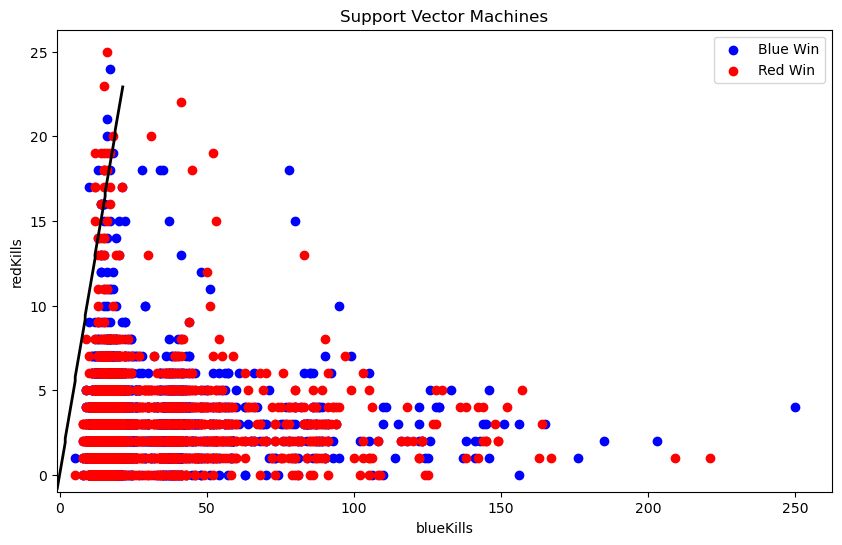

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Función para calcular el kernel lineal
def linear_kernel(x, y):
    return np.dot(x, y) # Calcular producto punto entre los dos vectores de entrada

# Función para entrenar el modelo SVM
def train_svm(X, y, C=1.0):
    n_samples, n_features = X.shape # Dimensión de los vectores de entrada
    # Inicialización de los parámetros
    w = np.zeros(n_features)
    b = 0

    # Maximizar la función de margen (utilizando gradiente descendente)
    learning_rate = 0.001
    epochs = 1000

    for epoch in range(epochs):
        for i in range(n_samples):
            if y[i] * (np.dot(X[i], w) + b) < 1:
                # Si el punto está mal clasificado
                w -= learning_rate * (2 * C * w - np.dot(X[i], y[i])) # Se ajustan tanto los pesos (w) como el sesgo (b) para mover la frontera de decisión y corregir la clasificación.
                b -= learning_rate * (-y[i])
            else:
                # Si el punto está correctamente clasificado
                w -= learning_rate * (2 * C * w) # Se ajusta el peso (w)
                
    return w, b

# Función para hacer predicciones
def predict_svm(X, w, b):
    return np.sign(np.dot(X, w) + b)

# Variables del df que se usan en el modelo
features = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Extrar datos de la base ya dividida en subsets para entranamiento, validación y testeo
X_train = train_set[features].values    # Varaibles del Data Train a usar 
y_train = train_set['blueWins'].values  # Variable objetivo

X_validation = val_set[features].values    # Varaibles del Data Validation a usar 
y_validation = val_set['blueWins'].values  # Variable objetivo

X_test = test_set[features].values         # Varaibles del Data Test a usar 
y_test = test_set['blueWins'].values       # Variable objetivo

# Tuning para hiperparámetro C (evaluar diferentes valores de C)
C_values = [0.006, 0.007, 0.008]
best_C = None
best_accuracy = 0

# Primera Prueba: C_values = [0.01, 0.1, 1, 10, 100] -> Con ello se obtuvo un mejor feat con 0.01 con 72.27%
# Segunda Prueba: C_values = [0.005, 0.01, 0.015] -> Con ello se obtuvo un mejor feat con 0.01 con 72.27%
# Tercera Prueba: C_values = [0.008, 0.01, 0.012] -> Con ello se obtuvo un mejor feat con 0.008 con 72.27%
# Cuarta Prueba: C_values = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01] -> Con ello se obtuvo un mejor feat con 0.007 con 72.57085020242914%
# Se usa C = 0.007 | C_values = [0.006, 0.007, 0.008]

for C in C_values: # Recorrer los valores de C
    # Entrenamiento del modelo con el valor actual de C
    w, b = train_svm(X_train, y_train, C=C)
    
    # Predicciones sobre el conjunto de validación
    y_pred_val = predict_svm(X_validation, w, b)
    
    # Calcular precisión en el conjunto de validación
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    
    # Si encontramos una mejor precisión, actualizamos el mejor valor de C
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor valor de C: {best_C} con precisión en validación: {best_accuracy*100}% \n")

# Entrenar el modelo final con el mejor C en el conjunto completo de entrenamiento
w, b = train_svm(X_train, y_train, C=best_C)

# Hacer predicciones sobre el conjunto de prueba
y_pred_test = predict_svm(X_test, w, b)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Extraer valores de la matriz de confusión
TN_SVM, FP_SVM, FN_SVM, TP_SVM = conf_matrix.ravel()

# Calcular métricas
precision_SVM = (TP_SVM + TN_SVM) / (TP_SVM + TN_SVM + FP_SVM + FN_SVM) if (TP_SVM + TN_SVM + FP_SVM + FN_SVM) > 0 else 0
sensibilidad_SVM = TP_SVM / (TP_SVM + FN_SVM) if (TP_SVM + FN_SVM) > 0 else 0
especificidad_SVM = TN_SVM / (TN_SVM + FP_SVM) if (TN_SVM + FP_SVM) > 0 else 0

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(f"TP: {TP_SVM}, FP: {FP_SVM}")
print(f"FN: {FN_SVM}, TN: {TN_SVM}")
print("------------------------------------------")

# Métrica de desempeño: Precisión, Sensibilidad y Especificidad
print("Precisión:", precision_SVM*100, "%")
print("Sensibilidad:", sensibilidad_SVM*100, " %")
print("Especificidad:", especificidad_SVM*100, " %")

# Graficar solo un par de datos
X_train_vis = train_set[['blueKills', 'redKills']].values
w_vis, b_vis = train_svm(X_train_vis, y_train, C=best_C)

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Plotear puntos de entrenamiento
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Blue Win')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Red Win')

# Dibujar la línea de decisión
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = predict_svm(np.c_[xx.ravel(), yy.ravel()], w_vis, b_vis)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.xlabel('blueKills')
plt.ylabel('redKills')
plt.title('Support Vector Machines')
plt.legend()
plt.show()

Por medio de ello, se puede definir que el modelo sobre el subset de testing tiene:<br>
- **Precisión:** 72.47% <br>
- **Sensibilidad:** 78.89% <br>
- **Especificidad:** 66.34% <br>

La precisión del 72.47% indica que el modelo clasifica correctamente la mayoría de los casos. Sin embargo, hay un 27.53% de error, lo que significa que, en algunas situaciones, el modelo falla al predecir correctamente si el equipo azul ganará. La sensibilidad mide cuántos de los casos en los que realmente gana el equipo azul fueron correctamente identificados por el modelo. Un 78.89% sugiere que el modelo es bueno detectando victorias del equipo azul, aunque aún existe un 21.19% de falsos negativos (casos en los que el equipo azul gana, pero el modelo predice que pierde). La especificidad mide cuántos de los casos en los que el equipo azul pierde fueron correctamente clasificados. Con 66.34%, el modelo tiene más dificultades en detectar correctamente las derrotas del equipo azul, lo que implica que hay un 33.66% de falsos positivos (casos en los que el modelo predice que el equipo azul ganará, pero realmente pierde).

---

### **Task 3.2** - Support Vector Machines: Clasificación de Partidas de League of Legends | Con Libreria <br> 
Repita los pasos para entrenar su modelo, pero ahora usando librerías y compare los resultados.

Mejor valor de C: 0.006 con precisión en validación: 72.67206477732793% 

Matriz de confusión:
TP: 356, FP: 138
FN: 127, TN: 367
------------------------------------------
Precisión: 73.17813765182186 %
Sensibilidad: 73.70600414078675 %
Especificidad: 72.67326732673267 %


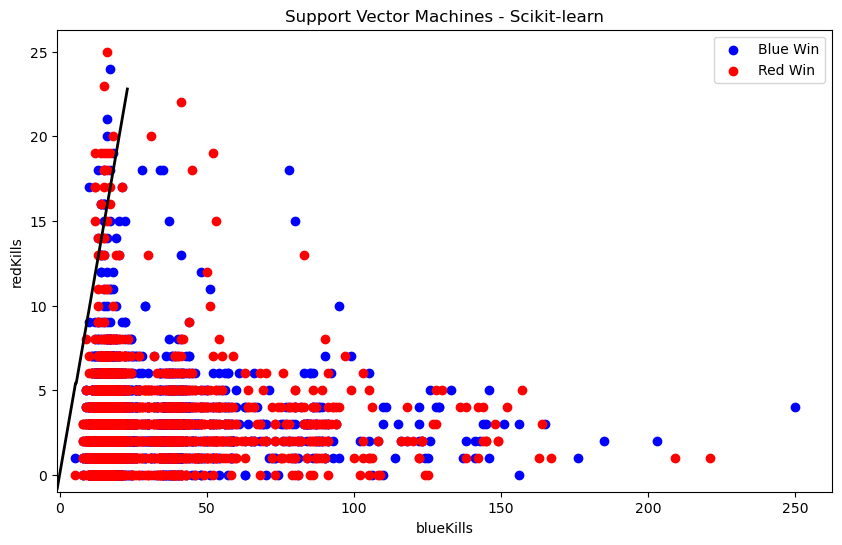

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Variables del df que se usan en el modelo
features = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Extraer datos de la base ya dividida en subsets para entrenamiento, validación y testeo
X_train = train_set[features].values    
y_train = train_set['blueWins'].values  

X_validation = val_set[features].values    
y_validation = val_set['blueWins'].values  

X_test = test_set[features].values         
y_test = test_set['blueWins'].values       

# Tuning para hiperparámetro C
C_values = [0.005, 0.006, 0.007]
best_C = None
best_accuracy = 0

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    
    y_pred_val = svm_model.predict(X_validation)
    accuracy_val = accuracy_score(y_validation, y_pred_val)
    
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor valor de C: {best_C} con precisión en validación: {best_accuracy*100}% \n")

# Primera Prueba: C_values = [0.01, 0.1, 1, 10, 100] -> Con ello se obtuvo un mejor feat con 0.01 con 72.57085020242914%
# Segunda Prueba: C_values = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01] -> Con ello se obtuvo un mejor feat con 0.006 con con 72.67206477732793%
# Se usa C = 0.006 | C_values = [0.006, 0.007, 0.008]

# Entrenar el modelo final con el mejor C en el conjunto completo de entrenamiento
svm_model = SVC(kernel='linear', C=best_C)
svm_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_test = svm_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_Lib = confusion_matrix(y_test, y_pred_test)
TN_SVM_Lib, FP_SVM_Lib, FN_SVM_Lib, TP_SVM_Lib = conf_matrix_Lib.ravel()

# Calcular métricas
precision_SVM_Lib = accuracy_score(y_test, y_pred_test)
sensibilidad_SVM_Lib = TP_SVM_Lib / (TP_SVM_Lib + FN_SVM_Lib) if (TP_SVM_Lib + FN_SVM_Lib) > 0 else 0
especificidad_SVM_Lib = TN_SVM_Lib / (TN_SVM_Lib + FP_SVM_Lib) if (TN_SVM_Lib + FP_SVM_Lib) > 0 else 0

print("Matriz de confusión:")
print(f"TP: {TP_SVM_Lib}, FP: {FP_SVM_Lib}")
print(f"FN: {FN_SVM_Lib}, TN: {TN_SVM_Lib}")
print("------------------------------------------")

print("Precisión:", precision_SVM_Lib*100, "%")
print("Sensibilidad:", sensibilidad_SVM_Lib*100, "%")
print("Especificidad:", especificidad_SVM_Lib*100, "%")

# GRAFICAR
X_train_vis = train_set[['blueKills', 'redKills']].values

# Entrenar el modelo SVM con scikit-learn con 2 variables para graficar
svm_model.fit(X_train_vis, y_train)

# Crear la malla para la gráfica
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir valores en la malla
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='Blue Win')
plt.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], color='r', label='Red Win')

plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.xlabel('blueKills')
plt.ylabel('redKills')
plt.title('Support Vector Machines - Scikit-learn')
plt.legend()
plt.show()


Por medio de ello, se puede definir que el modelo sobre el subset de testing tiene:<br>
- **Precisión:** 73.17% <br>
- **Sensibilidad:** 73.71% <br>
- **Especificidad:** 72.67% <br>

El nuevo modelo, implementado con librerías, muestra una ligera mejora en la precisión (73.17%) en comparación con el modelo anterior (72.47%). Sin embargo, la diferencia más notable se encuentra en la sensibilidad y especificidad, que ahora están mucho más equilibradas, en contraste con la implementación manual, donde la sensibilidad era significativamente mayor que la especificidad. Esto sugiere que el modelo con librerías tiene una mejor capacidad para predecir tanto victorias como derrotas del equipo azul de manera más equitativa, reduciendo la cantidad de falsos positivos y falsos negativos. En otras palabras, mientras que la primera versión tenía un sesgo hacia la predicción de victorias del equipo azul, la versión con librerías ha logrado un rendimiento más estable y generalizable.  

**¿Cuál implementación fue mejor? ¿Por qué?**<br>
La implementación con librerías fue mejor porque logró un mejor balance entre sensibilidad y especificidad, evitando el sesgo hacia las victorias del equipo azul que se observaba en el modelo manual. Además, es probable que el modelo con librerías haya utilizado técnicas de optimización avanzadas, como mejor elección de hiperparámetros y mayor eficiencia en los cálculos, lo que permitió obtener un resultado más robusto sin errores manuales. Implementar un modelo desde cero puede ser útil para comprender su funcionamiento, pero en términos de rendimiento y escalabilidad, las librerías especializadas ofrecen mejor optimización y menor riesgo de errores humanos. 

---

### **Task 3.3** - Comparación <br> 
Al finalizar de los tasks 3.1 y 3.2, seleccione el modelo que mejor lo haya hecho en cada task (el implementado por ustedes o el de la librería), es decir, el task 3.1 tome un modelo y del 3.2 otro; con esto proceda a responder dentro de su Jupyter Notebook como una celda tipo Markdown: 
- **¿Cómo difirieron los grupos creados por ambos modelos?**<br>
Los grupos creados por ambos modelos difieren principalmente en la forma en que clasifican las victorias y derrotas del equipo azul. En el modelo manual, la sensibilidad era más alta que la especificidad, lo que significa que tendía a predecir más victorias del equipo azul, incluso cuando algunas eran realmente derrotas (mayor cantidad de falsos positivos). En cambio, en el modelo con librerías, la sensibilidad y especificidad son mucho más equilibradas, lo que indica que este modelo logró una separación más uniforme entre los casos de victoria y derrota, reduciendo errores de clasificación en ambos sentidos.

- **¿Cuál de los modelos fue más rápido?**<br>
En términos de velocidad, el modelo con librerías fue sin duda más rápido. Las librerías optimizadas para machine learning están diseñadas para manejar grandes volúmenes de datos de manera eficiente, utilizando algoritmos optimizados y paralelización en hardware avanzado. En contraste, el modelo manual requirió cálculos personalizados, lo que lo hace más lento y menos eficiente, especialmente en conjuntos de datos grandes.

- **¿Qué modelo usarían?**<br>
Dado que el modelo con librerías fue más preciso, equilibrado y rápido, este sería el modelo preferido para su uso en aplicaciones reales. A menos que se requiera un análisis detallado del proceso de clasificación, la implementación manual no aporta ventajas significativas frente a una versión optimizada con librerías.

---

### Link a Repositorio Github <br>
https://github.com/danielanavas2002/InteligenciaArtificial/tree/main/Laboratorio/Laboratorio02